In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
lat_lngs = [pair for pair in zip(lats, lngs)]
lat_lngs

[(-51.829237758984355, -35.218496479207204),
 (74.44869125760482, -30.739902639225477),
 (0.5766717516926008, -127.02741184981349),
 (-6.569265635442392, -110.46047474084347),
 (87.51407556769263, -39.81696673620317),
 (82.69873328160696, -177.22909277126797),
 (-56.01652503621515, 81.98171265174625),
 (5.090183320746334, 122.78519677759226),
 (36.9189535040569, 6.964988537556081),
 (37.15616906303535, 123.45653558348158),
 (-83.2400075080108, -95.67944464518234),
 (-15.645150366757463, 151.13747950756232),
 (71.42715991814836, 137.49120646409244),
 (-17.293286449549555, 97.03610378805962),
 (79.40566123434766, 21.13004296854183),
 (10.630452506291846, -172.62455121355092),
 (85.54869818446807, -74.78335357268165),
 (-36.85223003749243, 154.998154878496),
 (-77.56457742567272, 13.153943099041072),
 (18.041868260586057, -129.64460923703794),
 (31.36207235672056, -114.14855580553696),
 (-75.46836020646676, -19.196387952113326),
 (21.164381983453907, -160.70457116482117),
 (63.55595293439

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-51.829237758984355, -35.218496479207204),
 (74.44869125760482, -30.739902639225477),
 (0.5766717516926008, -127.02741184981349),
 (-6.569265635442392, -110.46047474084347),
 (87.51407556769263, -39.81696673620317),
 (82.69873328160696, -177.22909277126797),
 (-56.01652503621515, 81.98171265174625),
 (5.090183320746334, 122.78519677759226),
 (36.9189535040569, 6.964988537556081),
 (37.15616906303535, 123.45653558348158),
 (-83.2400075080108, -95.67944464518234),
 (-15.645150366757463, 151.13747950756232),
 (71.42715991814836, 137.49120646409244),
 (-17.293286449549555, 97.03610378805962),
 (79.40566123434766, 21.13004296854183),
 (10.630452506291846, -172.62455121355092),
 (85.54869818446807, -74.78335357268165),
 (-36.85223003749243, 154.998154878496),
 (-77.56457742567272, 13.153943099041072),
 (18.041868260586057, -129.64460923703794),
 (31.36207235672056, -114.14855580553696),
 (-75.46836020646676, -19.196387952113326),
 (21.164381983453907, -160.70457116482117),
 (63.55595293439

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | tabialan
City not found. Skipping...
Processing Record 9 of Set 1 | constantine
Processing Record 10 of Set 1 | yatou
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | samarai
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | labuhan
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | kiama
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | guerrero negr

Processing Record 36 of Set 4 | alofi
Processing Record 37 of Set 4 | zemio
Processing Record 38 of Set 4 | syracuse
Processing Record 39 of Set 4 | weligama
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | jabinyanah
Processing Record 43 of Set 4 | haines junction
Processing Record 44 of Set 4 | antofagasta
Processing Record 45 of Set 4 | savinka
Processing Record 46 of Set 4 | lima
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | general roca
Processing Record 49 of Set 4 | goderich
Processing Record 50 of Set 4 | tubruq
City not found. Skipping...
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | eureka
Processing Record 5 of Set 5 | parlakimidi
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | tuktoyaktuk
Processing Record 8 of Set 5 | riyadh
Processing Record 9 of

Processing Record 25 of Set 8 | raurkela
City not found. Skipping...
Processing Record 26 of Set 8 | talaya
Processing Record 27 of Set 8 | usila
City not found. Skipping...
Processing Record 28 of Set 8 | sabha
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | linhares
Processing Record 31 of Set 8 | taltal
Processing Record 32 of Set 8 | rawson
Processing Record 33 of Set 8 | lyubim
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | punta alta
Processing Record 36 of Set 8 | jarjis
City not found. Skipping...
Processing Record 37 of Set 8 | dali
Processing Record 38 of Set 8 | blackwater
Processing Record 39 of Set 8 | buldana
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | constitucion
Processing Record 42 of Set 8 | liwale
Processing Record 43 of Set 8 | marquette
Processing Record 44 of Set 8 | khandbari
Processing Record 45 of Set 8 | saint-gilles
Processing Record 46 of Set 8 | ban phai
Processing Record 47 of Set 8

Processing Record 11 of Set 12 | were ilu
Processing Record 12 of Set 12 | hondo
Processing Record 13 of Set 12 | shenjiamen
Processing Record 14 of Set 12 | villarrobledo
Processing Record 15 of Set 12 | weinan
Processing Record 16 of Set 12 | tirat karmel
Processing Record 17 of Set 12 | uyuni
Processing Record 18 of Set 12 | san policarpo
Processing Record 19 of Set 12 | lac du bonnet
Processing Record 20 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 21 of Set 12 | nadym
Processing Record 22 of Set 12 | dalinghe
City not found. Skipping...
Processing Record 23 of Set 12 | carlyle
Processing Record 24 of Set 12 | berberati
Processing Record 25 of Set 12 | mushie
Processing Record 26 of Set 12 | oksfjord
Processing Record 27 of Set 12 | tanta
Processing Record 28 of Set 12 | kitimat
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | matamoros
Processing Record 31 of Set 12 | maghama
City not found. Skipping...
Processing Record 32 of Set 12 | i

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,73.51,88,97,3.76,UY,2021-02-03 02:25:58
1,Atuona,-9.8000,-139.0333,78.66,72,48,12.50,PF,2021-02-03 02:29:38
2,Puerto Ayora,-0.7393,-90.3518,77.29,85,100,5.73,EC,2021-02-03 02:29:39
3,Ilulissat,69.2167,-51.1000,-5.80,65,0,20.71,GL,2021-02-03 02:27:17
4,Busselton,-33.6500,115.3333,79.00,53,1,4.00,AU,2021-02-03 02:25:20
5,Constantine,36.3650,6.6147,49.17,72,0,4.61,DZ,2021-02-03 02:29:39
6,Yatou,37.1500,122.3833,38.53,71,14,16.71,CN,2021-02-03 02:29:39
7,Punta Arenas,-53.1500,-70.9167,57.20,67,90,21.85,CL,2021-02-03 02:27:28
8,Samarai,-10.6167,150.6667,84.27,71,86,5.95,PG,2021-02-03 02:29:39
9,Labuhan,-6.8844,112.2051,82.49,78,81,13.98,ID,2021-02-03 02:29:39


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-02-03 02:25:58,-33.6971,-53.4616,73.51,88,97,3.76
1,Atuona,PF,2021-02-03 02:29:38,-9.8000,-139.0333,78.66,72,48,12.50
2,Puerto Ayora,EC,2021-02-03 02:29:39,-0.7393,-90.3518,77.29,85,100,5.73
3,Ilulissat,GL,2021-02-03 02:27:17,69.2167,-51.1000,-5.80,65,0,20.71
4,Busselton,AU,2021-02-03 02:25:20,-33.6500,115.3333,79.00,53,1,4.00
...,...,...,...,...,...,...,...,...,...
580,Mangrol,IN,2021-02-03 02:27:12,21.1167,70.1167,68.58,50,0,10.67
581,Roma,US,2021-02-03 02:30:59,43.2128,-75.4557,25.00,80,90,8.05
582,Yumen,CN,2021-02-03 02:30:59,40.2833,97.2000,29.44,63,89,10.18
583,Karlivka,UA,2021-02-03 02:29:01,49.4567,35.1295,30.43,98,95,4.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

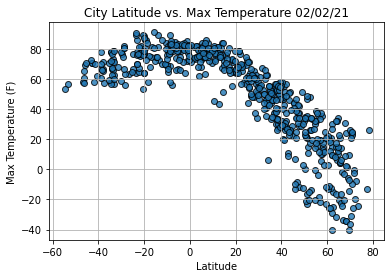

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

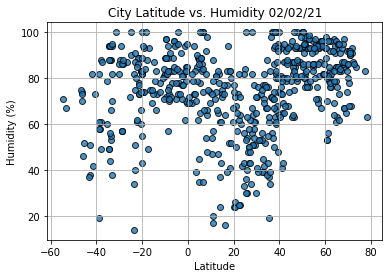

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

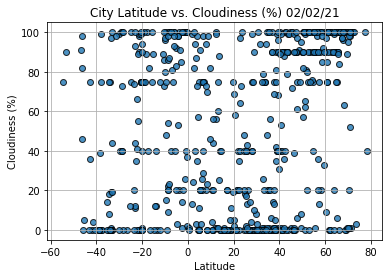

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

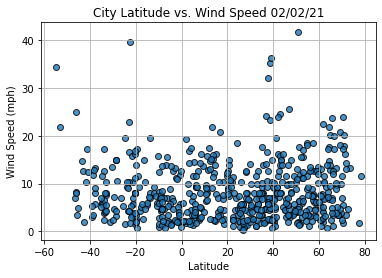

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()